# Clasificación de Riesgo de Accidentalidad

1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, SVM, RandomForest
4. Evaluación del Modelo: matriz de confusion, P,R, ROC
5. Guardar el modelo

* El despliegue se realiza en otro jupyter_notebook

In [238]:
# Importamos librerías básicas
import pandas as pd  # manipulación dataframes
import numpy as np   # matrices y vectores
import matplotlib.pyplot as plt  # gráfica
import kagglehub  # descargar datasets

In [239]:
# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download("hopesb/student-depression-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-depression-dataset


In [240]:
# Leer el archivo CSV (usando la ruta descargada)
data = pd.read_csv(f"{path}/Student Depression Dataset.csv")

In [241]:
# Mostrar las primeras filas del DataFrame
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [243]:
#convertir mi variable objetivo en categorica ya que no es numerica
data['Depression'] = data['Depression'].replace({1: 'Si', 0: 'No'})
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [245]:
#Corrección de variables categóricas
data['Gender']=data['Gender'].astype('category')
data['City']=data['City'].astype('category')
data['Profession']=data['Profession'].astype('category')
data['Sleep Duration']=data['Sleep Duration'].astype('category')
data['Dietary Habits']=data['Dietary Habits'].astype('category')
data['Degree']=data['Degree'].astype('category')
data['Have you ever had suicidal thoughts ?']=data['Have you ever had suicidal thoughts ?'].astype('category')
data['Family History of Mental Illness']=data['Family History of Mental Illness'].astype('category')
data['Depression']=data['Depression'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

#descripcion variable numericas

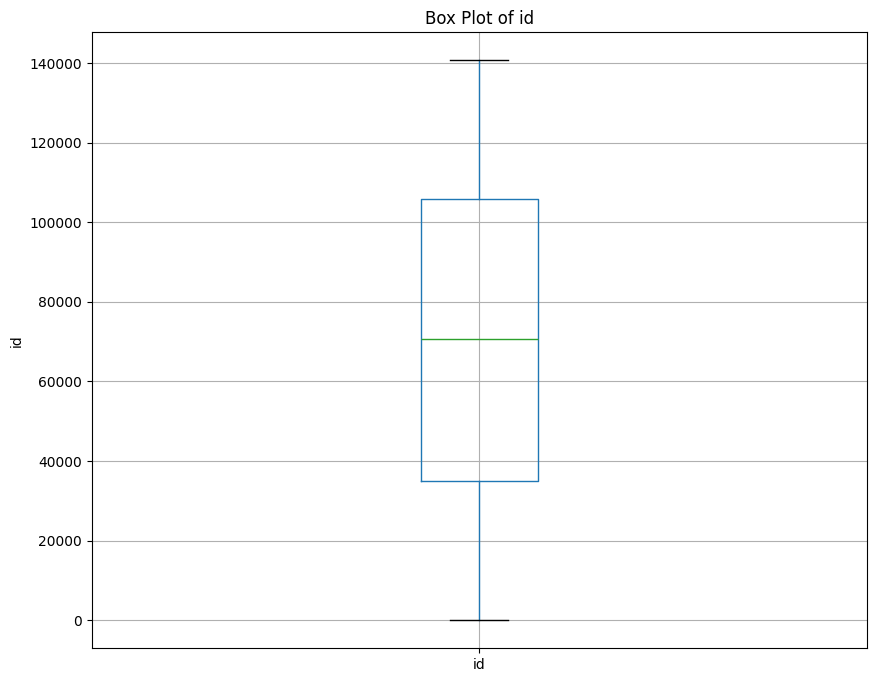

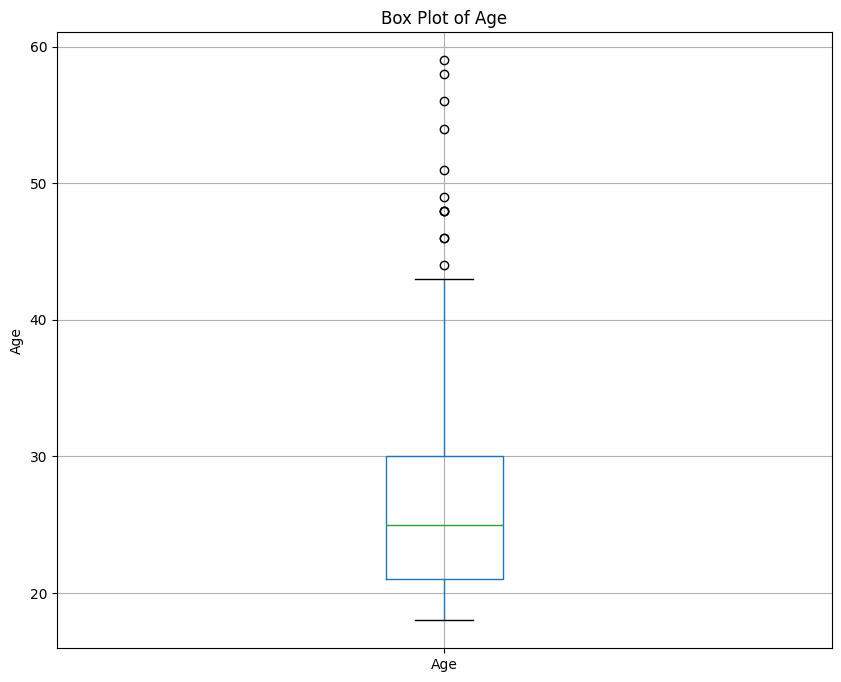

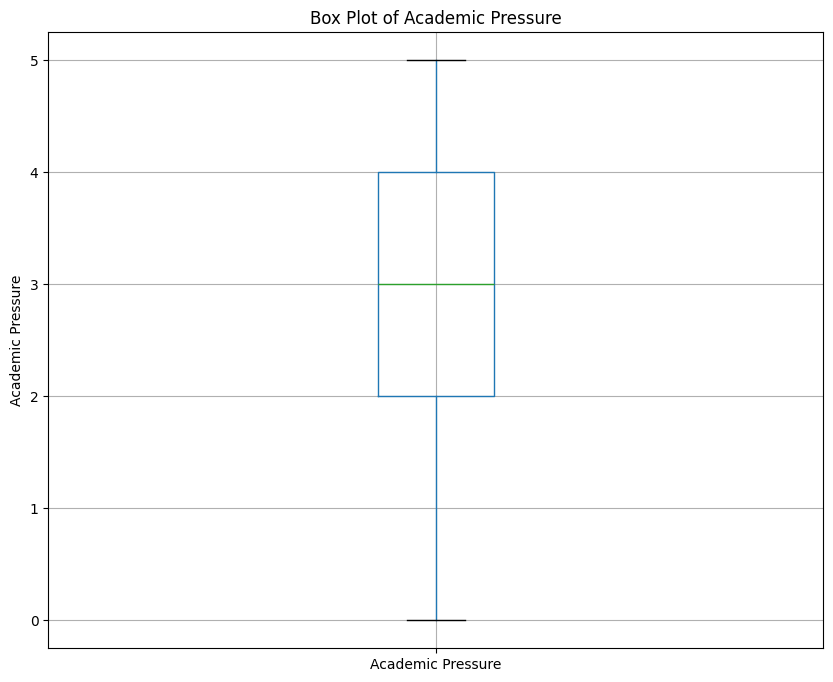

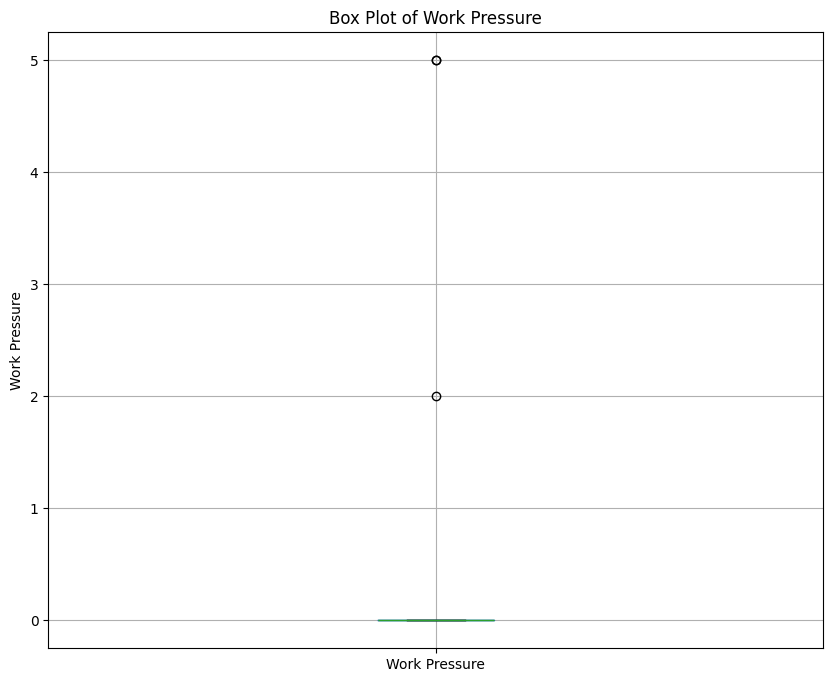

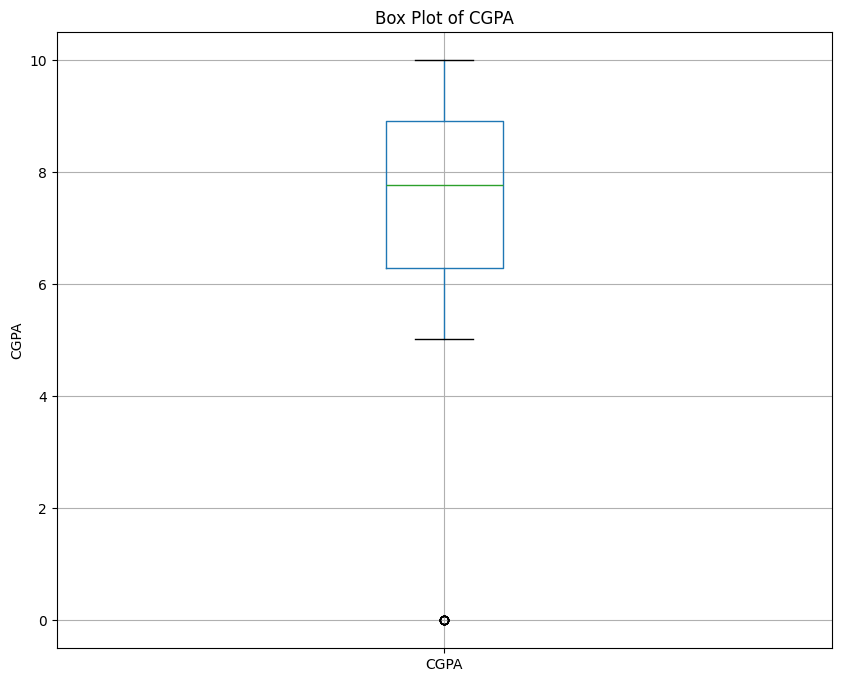

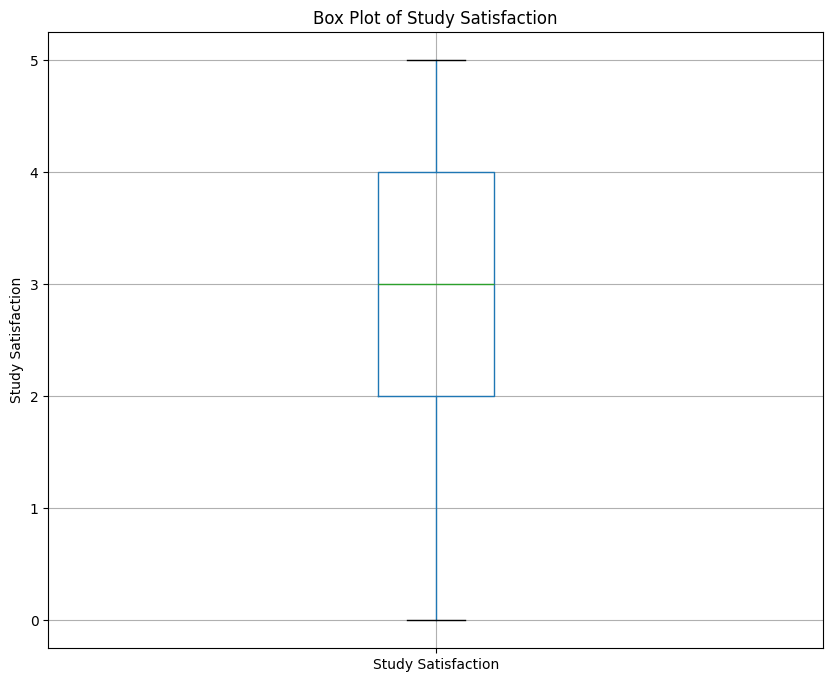

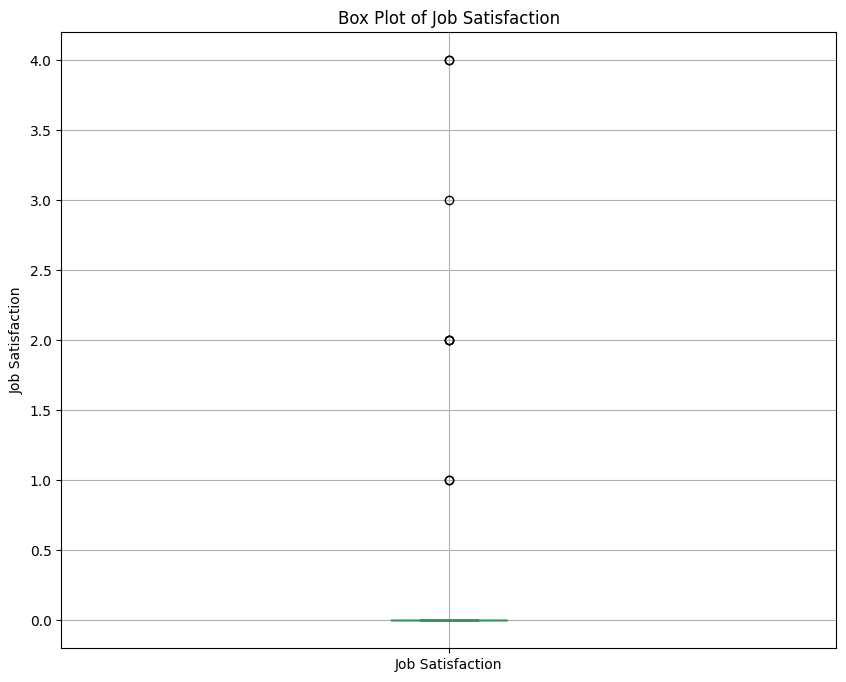

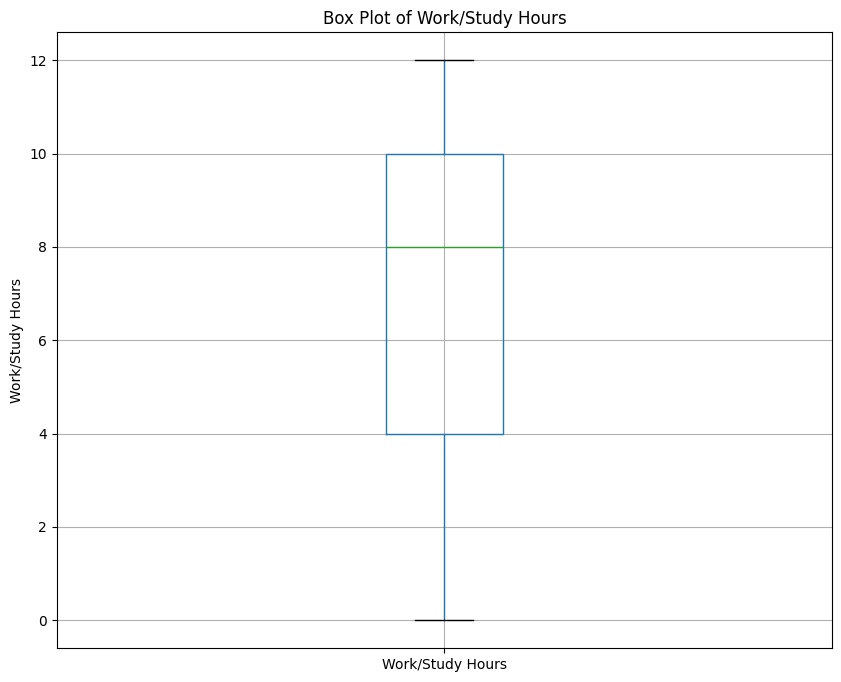

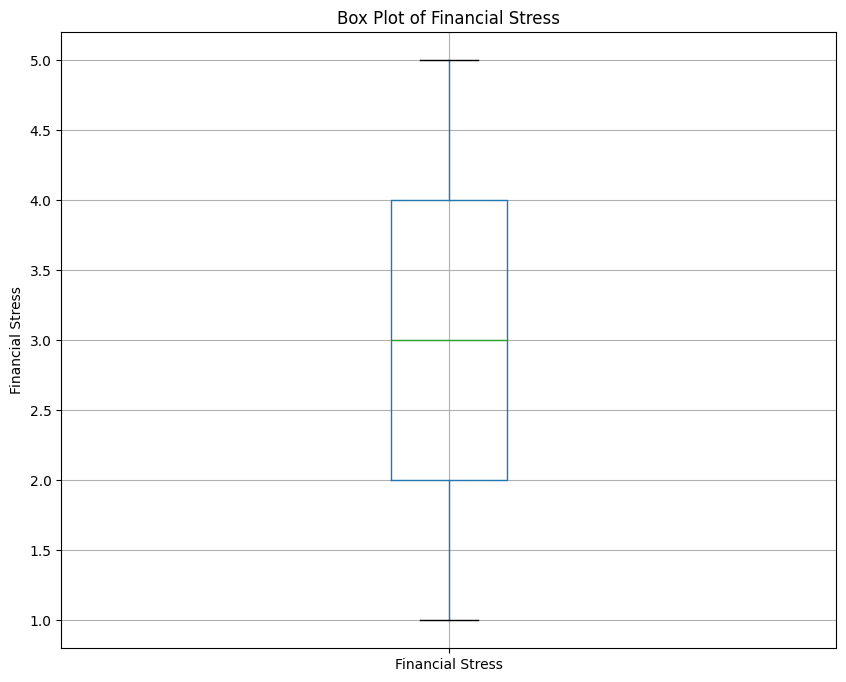

In [246]:
numeric_cols = data.select_dtypes(include=np.number).columns

for col in numeric_cols:
  plt.figure(figsize=(10, 8))
  data.boxplot(column=col)
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()


#Descripcion variables categoricas

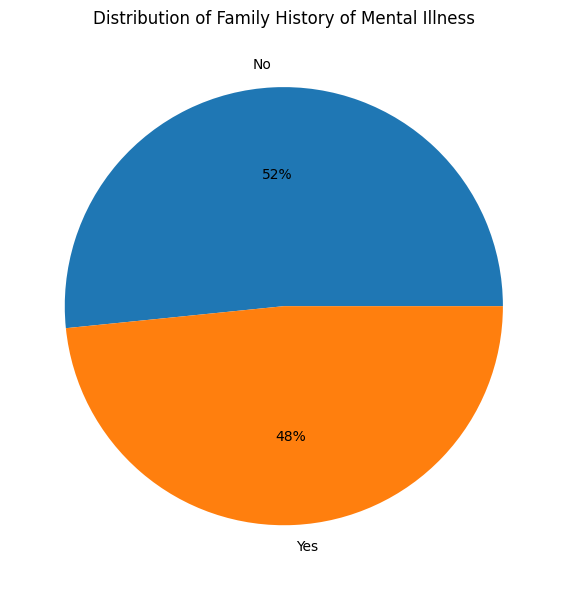

In [247]:
plt.figure(figsize=(12, 6))
data['Family History of Mental Illness'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Family History of Mental Illness')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

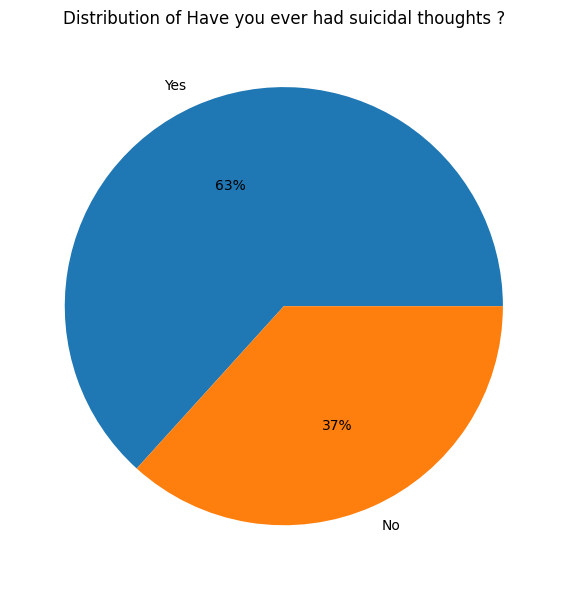

In [248]:
plt.figure(figsize=(12, 6))
data['Have you ever had suicidal thoughts ?'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Have you ever had suicidal thoughts ?')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

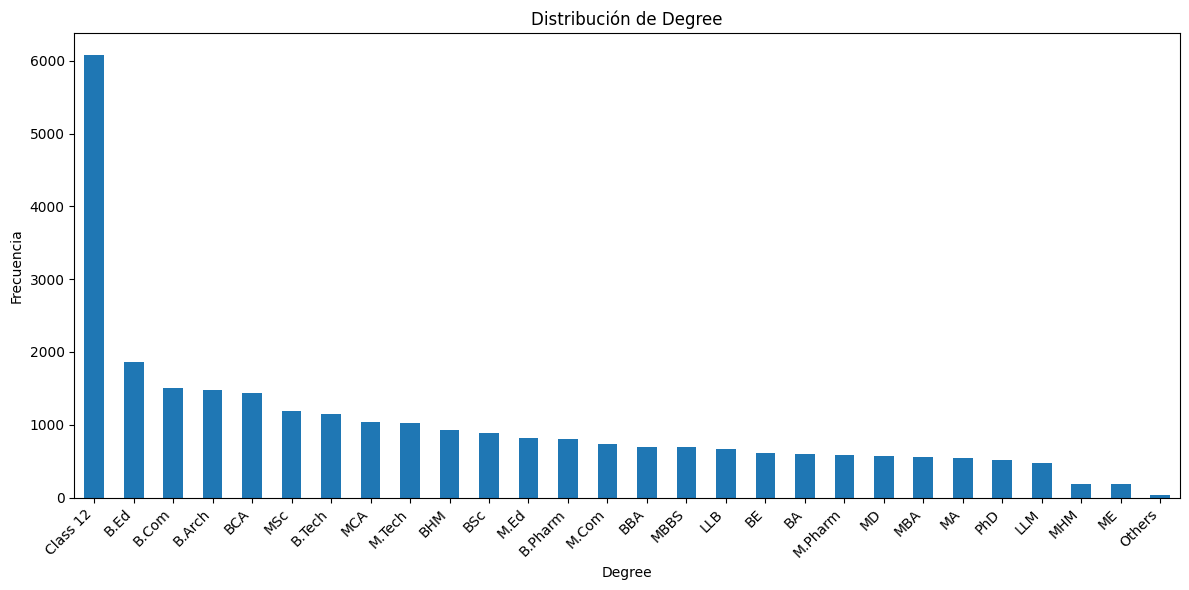

In [249]:
plt.figure(figsize=(12, 6))
data['Degree'].value_counts().plot(kind='bar')
plt.title('Distribución de Degree')
plt.xlabel('Degree')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

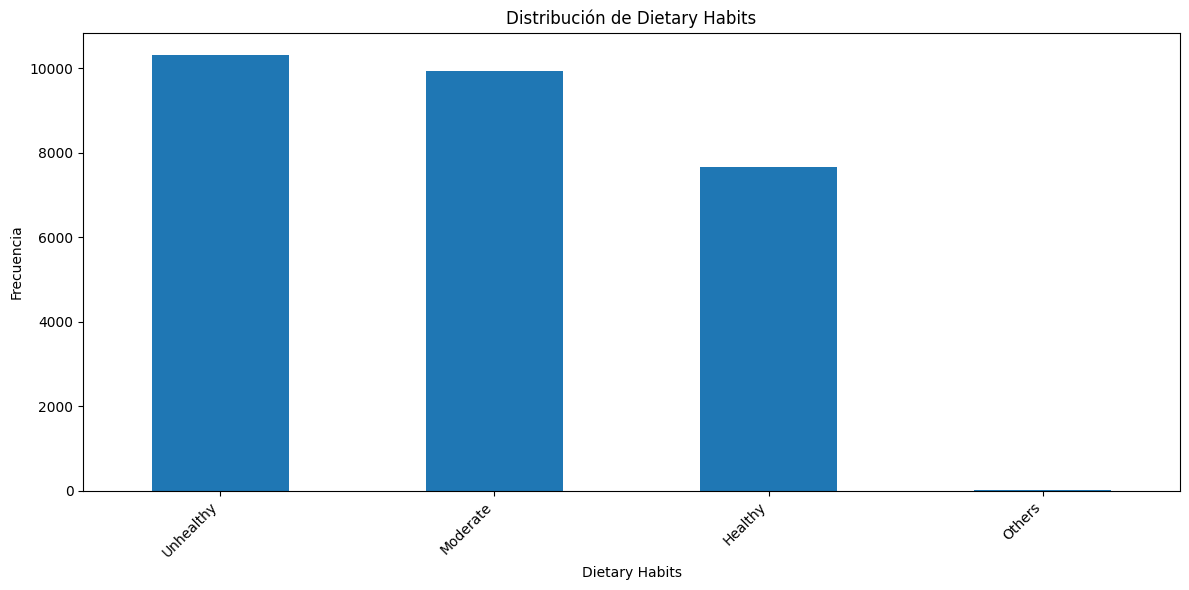

In [250]:
plt.figure(figsize=(12, 6))
data['Dietary Habits'].value_counts().plot(kind='bar')
plt.title('Distribución de Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

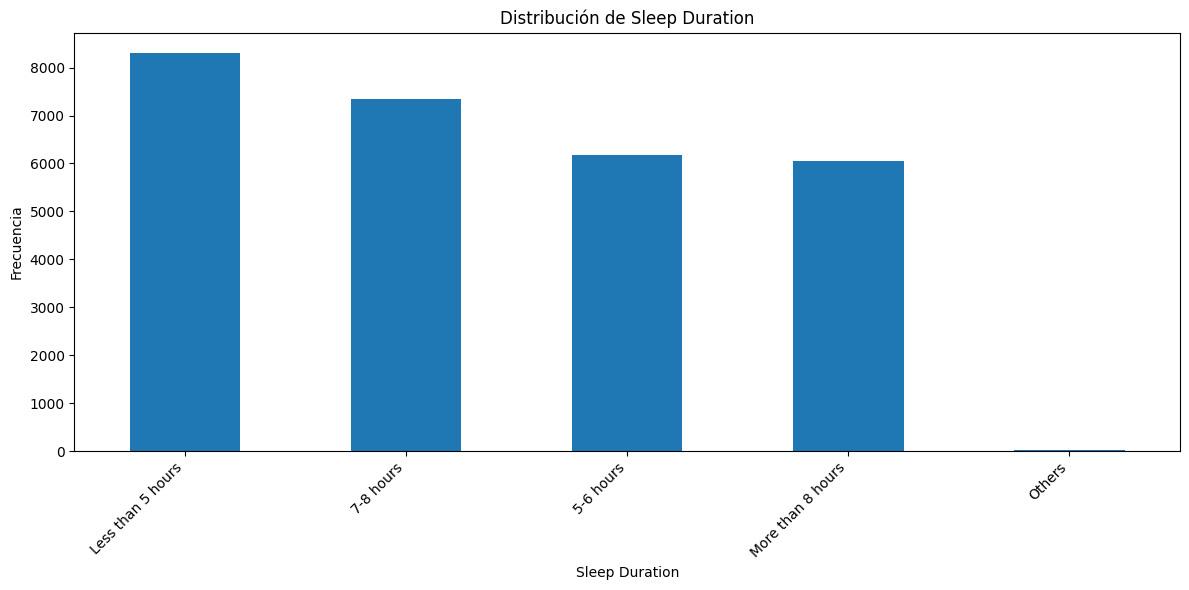

In [251]:
plt.figure(figsize=(12, 6))
data['Sleep Duration'].value_counts().plot(kind='bar')
plt.title('Distribución de Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

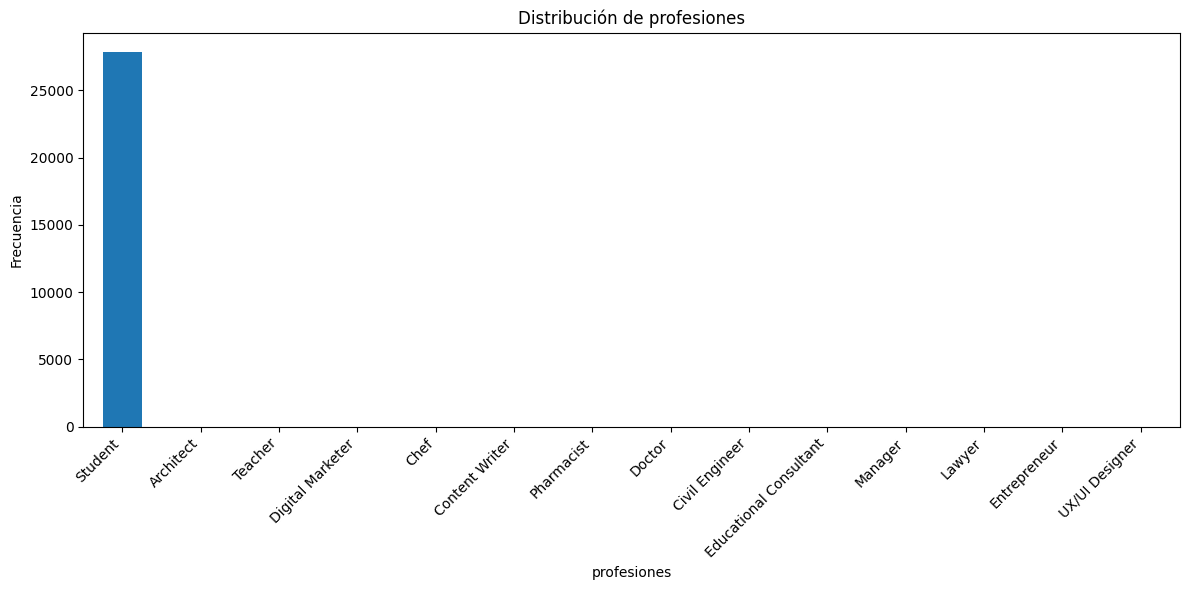

In [252]:
plt.figure(figsize=(12, 6))
data['Profession'].value_counts().plot(kind='bar')
plt.title('Distribución de profesiones')
plt.xlabel('profesiones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

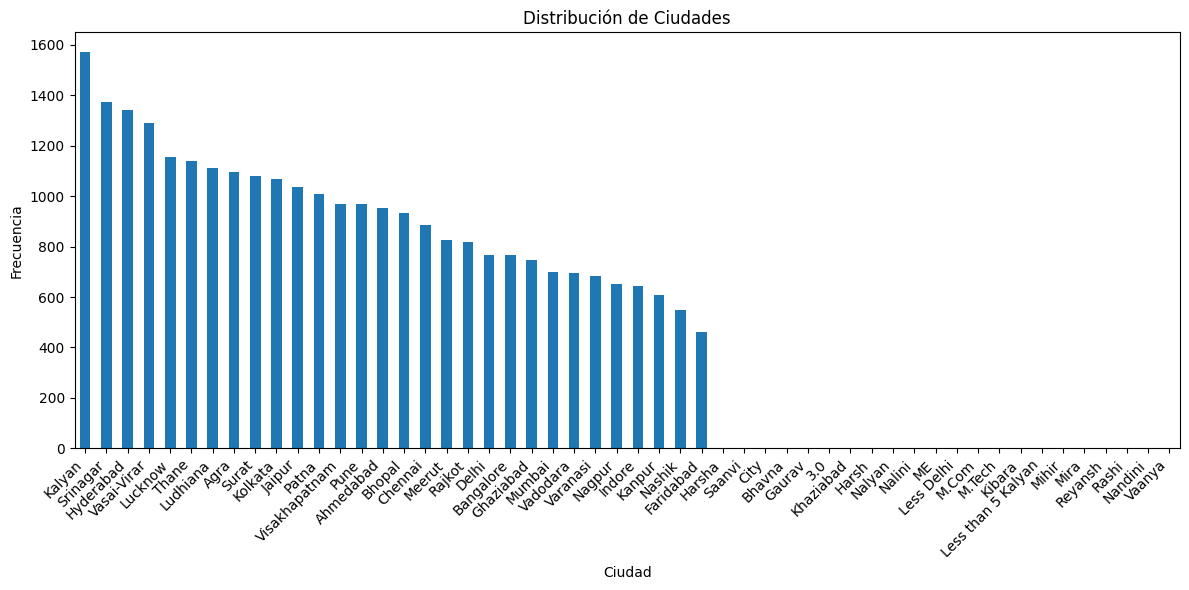

In [253]:
plt.figure(figsize=(12, 6))
data['City'].value_counts().plot(kind='bar')
plt.title('Distribución de Ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

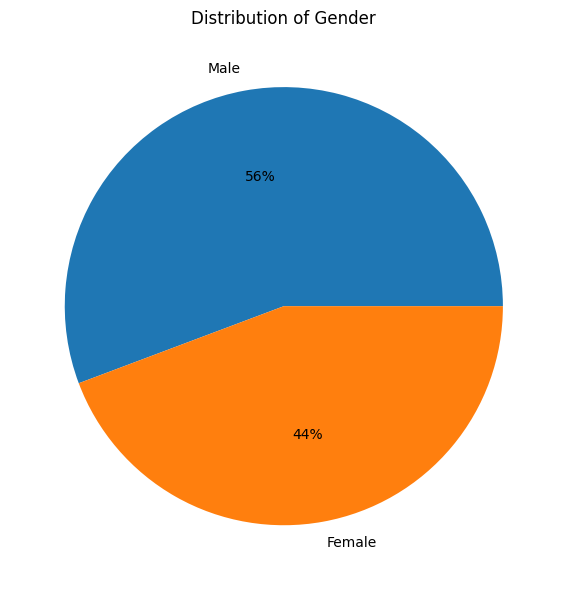

In [254]:
plt.figure(figsize=(12, 6))
data['Gender'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Gender')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

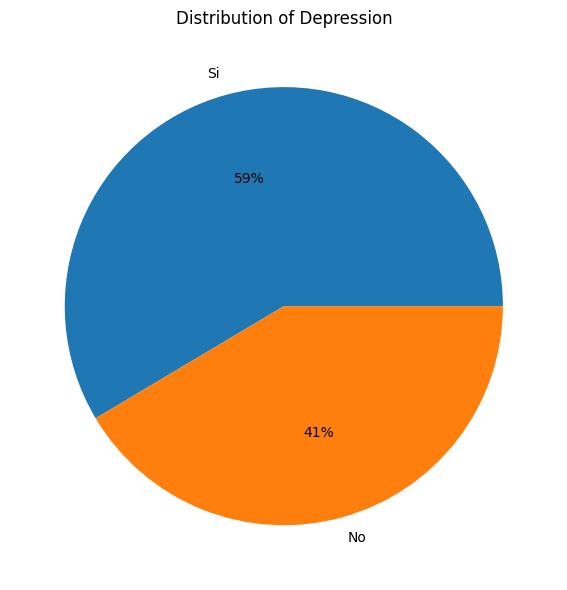

In [255]:
plt.figure(figsize=(12, 6))
data['Depression'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Depression')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Perfilado de datos en Python

In [256]:
# Instalar pandas profiling
!pip install ydata-profiling

In [257]:
# Cargar librería para Profiling
from pandas_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 18.99it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [258]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

\# **Dimensiones de la Calidad de Datos**

**Completitud:** ¿Está toda la información disponible? ¿Hay datos faltantes o ausentes?

**Exactitud:**¿La información es correcta y libre de error?

**Conformidad:** ¿Los valores de los datos están conformes con los formatos esperados? Ejemplo: Una fecha en formato AAAA/MM/DD cuando debería ser DD/MM/AAAA.

**Oportunidad:** ¿La información llega cuando se necesita?

**Duplicidad:** ¿Existen múltiples instancias, innecesarias de los mismos objetos de datos en el conjunto de datos?

**Integridad:** ¿Faltan datos relacionados importantes? ¿Es clara la conectividad y las relaciones con otros datos?

# **Diagnóstico de las dimensiones según el perfilado:**
* Completitud:  existen missing en la variable Financial Stress  (3 null)
* Exactitud: no tienen valores atipicos
* Conformidad: si, datos ok
* Oportunidad: no se podia evaluar
* Duplicidad: no se encontro duplicidad
* Integridad: sin validacion



# **B. LIMPIEZA  DE LOS DATOS**
1. Detección de duplicados
2. Selección de datos
3. Limpieza de atípicos
4. Limpieza de nulos

* 1. deteccion de duplicados

In [259]:
#no hay datos duplicados

* 2. seleccion de datos

In [260]:
# Variables irrelevantes para el proceso de minería
data = data.drop('id',axis=1) #Eliminamos el ID por ser irrelevante, axis=1 indica que es una columna
data.head()

Gender   Age           City Profession  Academic Pressure  Work Pressure  \
0    Male  33.0  Visakhapatnam    Student                5.0            0.0   
1  Female  24.0      Bangalore    Student                2.0            0.0   
2    Male  31.0       Srinagar    Student                3.0            0.0   
3  Female  28.0       Varanasi    Student                3.0            0.0   
4  Female  25.0         Jaipur    Student                4.0            0.0   

   CGPA  Study Satisfaction  Job Satisfaction     Sleep Duration  \
0  8.97                 2.0               0.0          5-6 hours   
1  5.90                 5.0               0.0          5-6 hours   
2  7.03                 5.0               0.0  Less than 5 hours   
3  5.59                 2.0               0.0          7-8 hours   
4  8.13                 3.0               0.0          5-6 hours   

  Dietary Habits   Degree Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm                                   Yes   
1       Moderate      BSc                                    No   
2        Healthy       BA                                    No   
3       Moderate      BCA                                   Yes   
4       Moderate   M.Tech                                   Yes   

   Work/Study Hours  Financial Stress Family History of Mental Illness  \
0               3.0               1.0                               No   
1               3.0               2.0                              Yes   
2               9.0               1.0                              Yes   
3               4.0               5.0                              Yes   
4               1.0               1.0                               No   

  Depression  
0         Si  
1         No  
2         No  
3         Si  
4         No

* 3. limpieza de atipicos

In [261]:
# no hay atipicos

* 4. limpieza de null

In [262]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['Financial Stress']] = ImpNumeros.fit_transform(data[['Financial Stress']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  float64 
 2   City                                   27901 non-null  category
 3   Profession                             27901 non-null  category
 4   Academic Pressure                      27901 non-null  float64 
 5   Work Pressure                          27901 non-null  float64 
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  float64 
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  category
 10  Dietary Habits                         27901 non-null  cat

In [263]:
#Valores de la imputación
print(ImpNumeros.statistics_)

[3.13986666]


# **C. MEJORA DE LOS DATOS**


* 1. Eliminar variable innecesaria

In [264]:
data = data[data['Profession'] == 'Student']

In [265]:
data = data.drop(columns=['Profession'])
data.head()

Gender   Age           City  Academic Pressure  Work Pressure  CGPA  \
0    Male  33.0  Visakhapatnam                5.0            0.0  8.97   
1  Female  24.0      Bangalore                2.0            0.0  5.90   
2    Male  31.0       Srinagar                3.0            0.0  7.03   
3  Female  28.0       Varanasi                3.0            0.0  5.59   
4  Female  25.0         Jaipur                4.0            0.0  8.13   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 2.0               0.0          5-6 hours        Healthy   
1                 5.0               0.0          5-6 hours       Moderate   
2                 5.0               0.0  Less than 5 hours        Healthy   
3                 2.0               0.0          7-8 hours       Moderate   
4                 3.0               0.0          5-6 hours       Moderate   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0  B.Pharm                                   Yes               3.0   
1      BSc                                    No               3.0   
2       BA                                    No               9.0   
3      BCA                                   Yes               4.0   
4   M.Tech                                   Yes               1.0   

   Financial Stress Family History of Mental Illness Depression  
0               1.0                               No         Si  
1               2.0                              Yes         No  
2               1.0                              Yes         No  
3               5.0                              Yes         Si  
4               1.0                               No         No

* 2. Analisis de correlaciones

In [266]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas
data_num = pd.get_dummies(data, drop_first=True, dtype=int)
data_num.head()

Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0  33.0                5.0            0.0  8.97                 2.0   
1  24.0                2.0            0.0  5.90                 5.0   
2  31.0                3.0            0.0  7.03                 5.0   
3  28.0                3.0            0.0  5.59                 2.0   
4  25.0                4.0            0.0  8.13                 3.0   

   Job Satisfaction  Work/Study Hours  Financial Stress  Gender_Male  \
0               0.0               3.0               1.0            1   
1               0.0               3.0               2.0            0   
2               0.0               9.0               1.0            1   
3               0.0               4.0               5.0            0   
4               0.0               1.0               1.0            0   

   City_Agra  ...  Degree_MCA  Degree_MD  Degree_ME  Degree_MHM  Degree_MSc  \
0          0  ...           0          0          0           0           0   
1          0  ...           0          0          0           0           0   
2          0  ...           0          0          0           0           0   
3          0  ...           0          0          0           0           0   
4          0  ...           0          0          0           0           0   

   Degree_Others  Degree_PhD  Have you ever had suicidal thoughts ?_Yes  \
0              0           0                                          1   
1              0           0                                          0   
2              0           0                                          0   
3              0           0                                          1   
4              0           0                                          1   

   Family History of Mental Illness_Yes  Depression_Si  
0                                     0              1  
1                                     1              0  
2                                     1              0  
3                                     1              1  
4                                     0              0  

[5 rows x 97 columns]

In [267]:
#Correlaciones
data_num.corr()

Age  Academic Pressure  \
Age                                        1.000000          -0.075871   
Academic Pressure                         -0.075871           1.000000   
Work Pressure                              0.002018          -0.022236   
CGPA                                       0.005167          -0.022325   
Study Satisfaction                         0.009131          -0.110903   
...                                             ...                ...   
Degree_Others                              0.006248          -0.005076   
Degree_PhD                                 0.093635           0.008387   
Have you ever had suicidal thoughts ?_Yes -0.113654           0.261580   
Family History of Mental Illness_Yes      -0.004973           0.030122   
Depression_Si                             -0.226738           0.474805   

                                           Work Pressure      CGPA  \
Age                                             0.002018  0.005167   
Academic Pressure                              -0.022236 -0.022325   
Work Pressure                                   1.000000 -0.050919   
CGPA                                           -0.050919  1.000000   
Study Satisfaction                             -0.021154 -0.044227   
...                                                  ...       ...   
Degree_Others                                  -0.000347 -0.001619   
Degree_PhD                                     -0.001350  0.001630   
Have you ever had suicidal thoughts ?_Yes      -0.001000  0.008344   
Family History of Mental Illness_Yes           -0.006210 -0.003717   
Depression_Si                                  -0.003345  0.022164   

                                           Study Satisfaction  \
Age                                                  0.009131   
Academic Pressure                                   -0.110903   
Work Pressure                                       -0.021154   
CGPA                                                -0.044227   
Study Satisfaction                                   1.000000   
...                                                       ...   
Degree_Others                                       -0.000763   
Degree_PhD                                          -0.000310   
Have you ever had suicidal thoughts ?_Yes           -0.083652   
Family History of Mental Illness_Yes                -0.003789   
Depression_Si                                       -0.168132   

                                           Job Satisfaction  Work/Study Hours  \
Age                                               -0.000428         -0.032775   
Academic Pressure                                 -0.024949          0.096291   
Work Pressure                                      0.770652         -0.005474   
CGPA                                              -0.053656          0.002613   
Study Satisfaction                                -0.021915         -0.036510   
...                                                     ...               ...   
Degree_Others                                     -0.000544         -0.012443   
Degree_PhD                                         0.009810         -0.015385   
Have you ever had suicidal thoughts ?_Yes         -0.003384          0.121851   
Family History of Mental Illness_Yes              -0.010012          0.017488   
Depression_Si                                     -0.003472          0.209024   

                                           Financial Stress  Gender_Male  \
Age                                               -0.095245     0.009034   
Academic Pressure                                  0.151786    -0.022254   
Work Pressure                                      0.001886     0.008720   
CGPA                                               0.005814     0.036313   
Study Satisfaction                                -0.065169    -0.015577   
...                                                     ...          ...   
Degree_Others                   

In [268]:
import seaborn as sns
plt.figure(figsize=(100,100))
sns.heatmap(data_num.corr(),annot=True)

<Axes: >

In [269]:
#no se encontraron correlaciones altamente peligrosas --> # Redundancias: correlaciones mayores a 0.8 en  la matriz

In [270]:
#Elimino variables irrelevantes de Data
data_num = data_num.drop([

   # Columnas de hábitos de sueño y dieta
    'Sleep Duration_7-8 hours',
    'Sleep Duration_Others',
    'Dietary Habits_Others',
    'Dietary Habits_Moderate',

    # Otras columnas no deseadas
    'Job Satisfaction',
    'Work Pressure',
    'CGPA',
    'Gender_Male'
], axis=1)

data_num.head()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0                 2.0               3.0   
1  24.0                2.0                 5.0               3.0   
2  31.0                3.0                 5.0               9.0   
3  28.0                3.0                 2.0               4.0   
4  25.0                4.0                 3.0               1.0   

   Financial Stress  City_Agra  City_Ahmedabad  City_Bangalore  City_Bhavna  \
0               1.0          0               0               0            0   
1               2.0          0               0               1            0   
2               1.0          0               0               0            0   
3               5.0          0               0               0            0   
4               1.0          0               0               0            0   

   City_Bhopal  ...  Degree_MCA  Degree_MD  Degree_ME  Degree_MHM  Degree_MSc  \
0            0  ...           0          0          0           0           0   
1            0  ...           0          0          0           0           0   
2            0  ...           0          0          0           0           0   
3            0  ...           0          0          0           0           0   
4            0  ...           0          0          0           0           0   

   Degree_Others  Degree_PhD  Have you ever had suicidal thoughts ?_Yes  \
0              0           0                                          1   
1              0           0                                          0   
2              0           0                                          0   
3              0           0                                          1   
4              0           0                                          1   

   Family History of Mental Illness_Yes  Depression_Si  
0                                     0              1  
1                                     1              0  
2                                     1              0  
3                                     1              1  
4                                     0              0  

[5 rows x 89 columns]

In [271]:
#Elimino variables irrelevantes de Data
data_num = data_num.drop([
    'City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhavna', 'City_Bhopal',
    'City_Chennai', 'City_City', 'City_Delhi', 'City_Faridabad', 'City_Gaurav',
    'City_Ghaziabad', 'City_Harsh', 'City_Harsha', 'City_Hyderabad', 'City_Indore',
    'City_Jaipur', 'City_Kalyan', 'City_Kanpur', 'City_Khaziabad', 'City_Kibara',
    'City_Kolkata', 'City_Less Delhi', 'City_Less than 5 Kalyan', 'City_Lucknow',
    'City_Ludhiana', 'City_M.Com', 'City_M.Tech', 'City_ME', 'City_Meerut',
    'City_Mihir', 'City_Mira', 'City_Mumbai', 'City_Nagpur', 'City_Nalini',
    'City_Nalyan', 'City_Nandini', 'City_Nashik', 'City_Patna', 'City_Pune',
    'City_Rajkot', 'City_Rashi', 'City_Reyansh', 'City_Saanvi', 'City_Srinagar',
    'City_Surat', 'City_Thane', 'City_Vaanya', 'City_Vadodara', 'City_Varanasi',
    'City_Vasai-Virar', 'City_Visakhapatnam'
], axis=1)

data_num.head()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0                 2.0               3.0   
1  24.0                2.0                 5.0               3.0   
2  31.0                3.0                 5.0               9.0   
3  28.0                3.0                 2.0               4.0   
4  25.0                4.0                 3.0               1.0   

   Financial Stress  Sleep Duration_Less than 5 hours  \
0               1.0                                 0   
1               2.0                                 0   
2               1.0                                 1   
3               5.0                                 0   
4               1.0                                 0   

   Sleep Duration_More than 8 hours  Dietary Habits_Unhealthy  Degree_B.Com  \
0                                 0                         0             0   
1                                 0                         0             0   
2                                 0                         0             0   
3                                 0                         0             0   
4                                 0                         0             0   

   Degree_B.Ed  ...  Degree_MCA  Degree_MD  Degree_ME  Degree_MHM  Degree_MSc  \
0            0  ...           0          0          0           0           0   
1            0  ...           0          0          0           0           0   
2            0  ...           0          0          0           0           0   
3            0  ...           0          0          0           0           0   
4            0  ...           0          0          0           0           0   

   Degree_Others  Degree_PhD  Have you ever had suicidal thoughts ?_Yes  \
0              0           0                                          1   
1              0           0                                          0   
2              0           0                                          0   
3              0           0                                          1   
4              0           0                                          1   

   Family History of Mental Illness_Yes  Depression_Si  
0                                     0              1  
1                                     1              0  
2                                     1              0  
3                                     1              1  
4                                     0              0  

[5 rows x 38 columns]

In [272]:
#Degree excepto Class 12 ya que tiene correlacion mayor a 0.05

data_num = data_num.drop([
    'Degree_B.Com', 'Degree_B.Ed', 'Degree_B.Pharm', 'Degree_B.Tech',
    'Degree_BA', 'Degree_BBA', 'Degree_BCA', 'Degree_BE', 'Degree_BHM',
    'Degree_BSc', 'Degree_LLB', 'Degree_LLM',
    'Degree_M.Com', 'Degree_M.Ed', 'Degree_M.Pharm', 'Degree_M.Tech',
    'Degree_MA', 'Degree_MBA', 'Degree_MBBS', 'Degree_MCA', 'Degree_MD',
    'Degree_ME', 'Degree_MHM', 'Degree_MSc', 'Degree_Others', 'Degree_PhD'
], axis=1)

data_num.head()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0                 2.0               3.0   
1  24.0                2.0                 5.0               3.0   
2  31.0                3.0                 5.0               9.0   
3  28.0                3.0                 2.0               4.0   
4  25.0                4.0                 3.0               1.0   

   Financial Stress  Sleep Duration_Less than 5 hours  \
0               1.0                                 0   
1               2.0                                 0   
2               1.0                                 1   
3               5.0                                 0   
4               1.0                                 0   

   Sleep Duration_More than 8 hours  Dietary Habits_Unhealthy  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   Degree_Class 12  Have you ever had suicidal thoughts ?_Yes  \
0                0                                          1   
1                0                                          0   
2                0                                          0   
3                0                                          1   
4                0                                          1   

   Family History of Mental Illness_Yes  Depression_Si  
0                                     0              1  
1                                     1              0  
2                                     1              0  
3                                     1              1  
4                                     0              0

<Axes: >

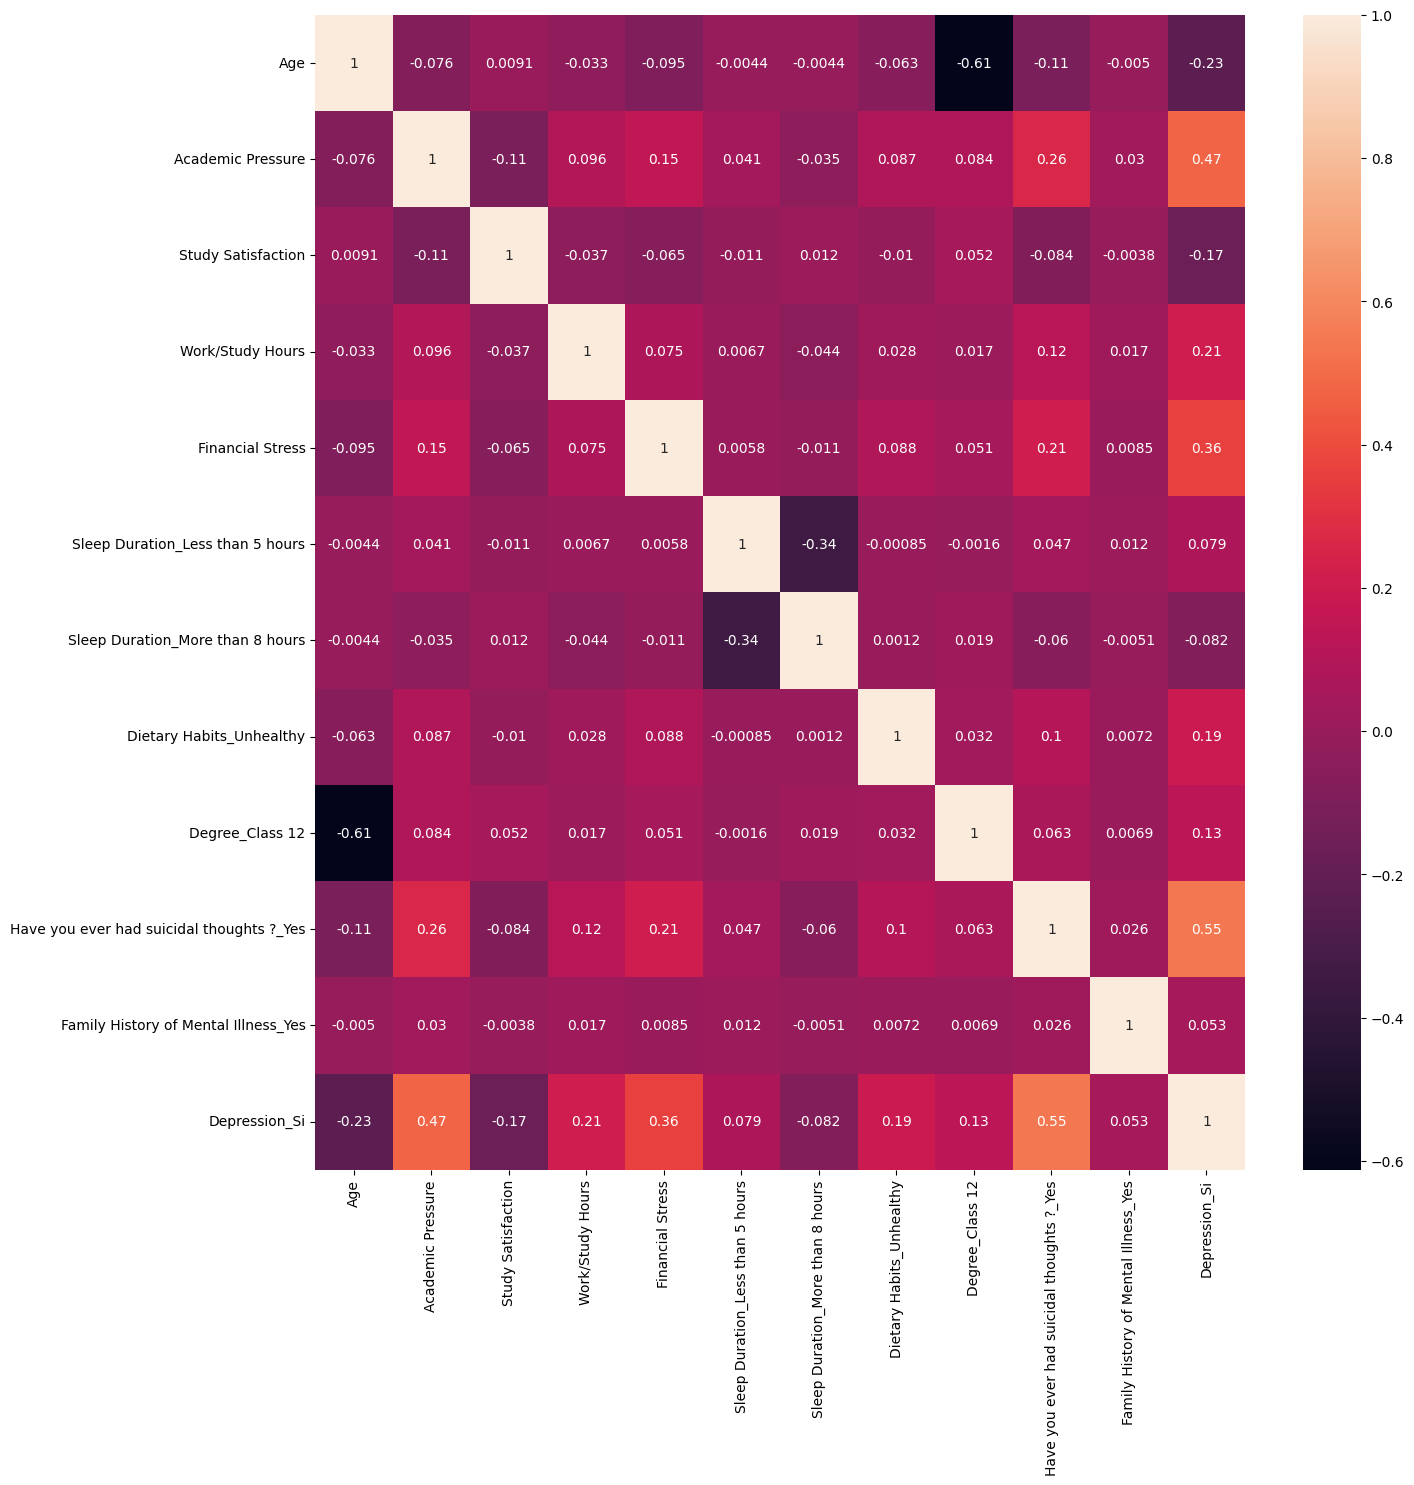

In [273]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data_num.corr(),annot=True)

* Balanceo de datos

<ipython-input-280-856ac4af3909>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data["Depression"]).plot(kind="bar")


<Axes: xlabel='Depression'>

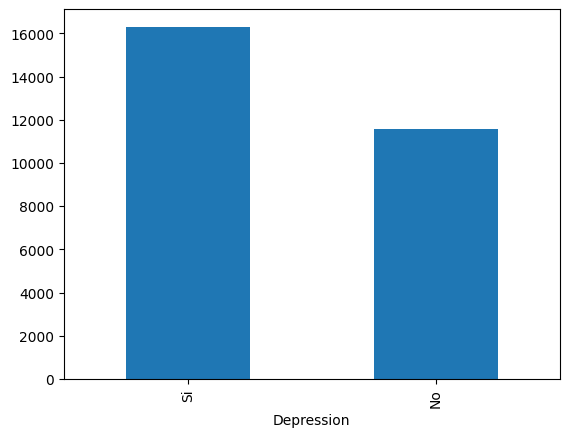

In [280]:
#Variable objetivo
pd.value_counts(data["Depression"]).plot(kind="bar")
#para haber balanceo debe estar por debajo del 50%, en este caso no sera necesario

In [282]:
#Guardamos los datos preparados
data_num.to_excel('./datosdepresion_numéricos.xlsx')